In [15]:
import pandas as pd
import numpy as np
from langchain_community.embeddings.ollama import OllamaEmbeddings

Embed all lines.

In [16]:
df = pd.read_csv('../data/new_data.csv')
df = df[~df['R2DiscussionType'].str.contains(",")]

In [18]:
df['R2DiscussionType'].value_counts()

R2DiscussionType
Seminar              333
Deliberation          85
Social                69
UX                    47
Procedure             46
Imaginative entry     18
Other                  6
Imaginative            2
Name: count, dtype: int64

In [19]:
df['R2DiscussionType'] = df['R2DiscussionType'].map(lambda x: 'Imaginative entry' if x == 'Imaginative' else x)

In [20]:
df['R2DiscussionType'].value_counts()

R2DiscussionType
Seminar              333
Deliberation          85
Social                69
UX                    47
Procedure             46
Imaginative entry     20
Other                  6
Name: count, dtype: int64

In [21]:
with open('../unprocessed_data/definitions.json', 'r') as file:
    instructions = file.read()

In [22]:
len(instructions)

5142

In [88]:
import ollama
modelfile='''
FROM phi3
SYSTEM """
<|begin_of_text|>
<|start_header_id|>system<|end_header_id|>
You are responsible for categorizing discourse. You get a message from the user and must figure out what type of discourse it is.
The following provides the definitions and associated examples in each category:
Discussion UX: emphasizes User's opinion about the IMapBook interface, or media they wish we would include, user experience, media, relationship with the media. The relevant examples in this category includes: 'I'm finding this program a bit slow and difficult to work in. ','I am not a fan of the sound effect, but would be a fan of some pictures.'.
Discussion Social: indicates Discussion that establishes or maintains a relationship and does NOT relate to the assignments. The relevant examples in this category includes 'Greetings','Hello! I am excited to work with you all.'.
Discussion Procedure: refers to Discussion toward accomplishing a task. How should the task be accomplished? Specifically, discussion of how to complete the assignment.Big Question is about how does this work? What does the teacher want us to do with this assignment? The relevant examples in this category includes: 'Are we each supposed to submit our own interpretations or compose something together?','Did we submit it? Is that why it is blank now?','What time is everyone available to meet and complete the task?'.
Discussion Deliberation: indicates Turns related to decision-making about the content…. Or writing or wording. It also indicates the internal procedure of an individual, and interpersonal functioning of the group. Big Question is about what should we do next? The relevant examples in this category includes: 'What should be included in a collaborative submission, how it should be worded.','What do you think about the questions? How should they be answered?','In terms of just answering, I feel like the tiger was behind the door, and later the King puts his daughter to trial…','That is exactly what I think as well.'.
Discussion Seminar: indicates discussion on the meaning or interpretation of content, such as My interpretation vs. your interpretation. What does it mean? The relevant examples in this category include: 'Perhaps the content could mean this…','I mean I think it states that the king does love the daughter at some point though. Maybe not to enough of a degree not to put her to trial...but he does love her, just like to a degree she loved the man'.
Discussion Imaginary: indicates discourse that places the learner in the discussion as an active participant. The relevant example includes 'does this mean that we are all like this too?'.
The messages are from a message board discussing a story named The Lady and the Tiger.
Respond with only the category of the provided text.
If you cannot determine the category please only write Other.
IT IS VERY IMPORTANT THAT YOU DO NOT EVER WRITE ANYTHING ELSE EXCEPT THE CATEGORY NAME OF THE MESSAGE.
<|eot_id|>
<|start_header_id|>user<|end_header_id|>
Message:
{{ .Prompt }}
<|eot_id|>
<|start_header_id|>assistant<|end_header_id|>
Discourse type: 
"""
'''

ollama.create(model='discourse', modelfile=modelfile)

ResponseError: pull model manifest: Get "https://registry.ollama.ai/v2/library/phi3/manifests/latest": dial tcp: lookup registry.ollama.ai: i/o timeout

In [86]:
df['Message'][140]

"BUT, he'd tell her which door leads to a man and which leads to the tiger, thinking that she will obviously choose to marry and live."

In [66]:
df['R2DiscussionType'][140]

'Seminar'

In [87]:
ollama.generate(model='discourse', prompt="I know I wouldn't be able to live with myself if I knew I was the reason the person I loved was killed in such a painful manner")['response']

'Discussion Seminar'

In [80]:
from tqdm import tqdm
responses = []
for message in tqdm(df['Message']):
    responses.append(ollama.generate(model='discourse', prompt=message)['response'])

100%|██████████| 606/606 [02:28<00:00,  4.08it/s]


In [81]:
responses = [response.replace('Discussion ', '') for response in responses]

In [82]:
response = [response if len(response) < 20 else 'Seminar' for response in responses]

In [83]:
np.mean([1 if a == b else 0 for a, b in zip(df['R2DiscussionType'], responses)])

0.6402640264026402

In [84]:
contexts = []
for message in tqdm(df['Message']):
    responses.append(ollama.generate(model='discourse', prompt=message)['response'])

{'model': 'discourse',
 'created_at': '2024-05-20T18:51:52.976338125Z',
 'response': 'Discussion Seminar',
 'done': True,
 'context': [128006,
  9125,
  128007,
  1432,
  128000,
  198,
  128006,
  9125,
  128007,
  198,
  2675,
  527,
  8647,
  369,
  22824,
  4954,
  41602,
  13,
  1472,
  636,
  264,
  1984,
  505,
  279,
  1217,
  323,
  2011,
  7216,
  704,
  1148,
  955,
  315,
  41602,
  433,
  374,
  13,
  198,
  791,
  2768,
  5825,
  279,
  17931,
  323,
  5938,
  10507,
  304,
  1855,
  5699,
  25,
  198,
  72121,
  62593,
  25,
  66159,
  2724,
  596,
  9647,
  922,
  279,
  358,
  2276,
  7280,
  3834,
  11,
  477,
  3772,
  814,
  6562,
  584,
  1053,
  2997,
  11,
  1217,
  3217,
  11,
  3772,
  11,
  5133,
  449,
  279,
  3772,
  13,
  578,
  9959,
  10507,
  304,
  420,
  5699,
  5764,
  25,
  364,
  40,
  2846,
  9455,
  420,
  2068,
  264,
  2766,
  6435,
  323,
  5107,
  311,
  990,
  304,
  13,
  23058,
  40,
  1097,
  539,
  264,
  8571,
  315,
  279,
  5222,
  25

In [89]:
ollama_emb = OllamaEmbeddings(
    model="llama3",
    # embed_instruction=instructions
)

In [90]:
embeddings  = ollama_emb.embed_documents(list(df['Message']))

In [91]:
embeddings = np.array(embeddings)

Get labels

In [92]:
labels = df['R2DiscussionType'].map(lambda x: next((i for i, v in enumerate(np.unique(df['R2DiscussionType'])) if v == x), None))

Reduce dimensionality

In [93]:
import umap

In [94]:
reducer = umap.UMAP()

In [95]:
reduced = reducer.fit_transform(embeddings)
reduced.shape

(606, 2)

Plot UMAP

In [96]:
from matplotlib import pyplot as plt

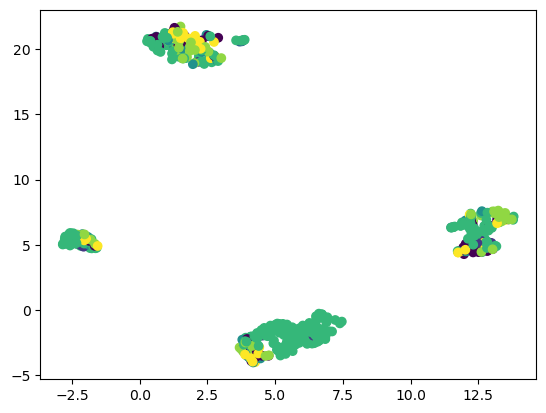

In [97]:
plt.scatter(
    reduced[:, 0],
    reduced[:, 1],
    c=labels
)
plt.show()

In [98]:
from sklearn.cluster import KMeans

Looking at what groups we get

In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced)

KMeans(n_clusters=4)

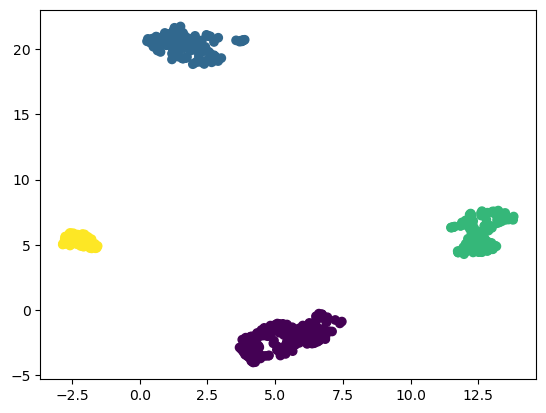

In [100]:
plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans.labels_)
plt.show()

In [120]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 240)
df[kmeans.labels_ == 3][['Message', 'R2DiscussionType']]

,Message,R2DiscussionType
0,Hello.,Social
3,I agree with Cassandra's noticing,Seminar
5,I loved the addition of,Seminar
6,"Her lover would die and never love another.""",Seminar
9,"If the princess possesses the same semi-barbaric trait as her father, then it would seem she directed her lover to the door with the tiger.",Seminar
12,"however, she only comments that a tiger would bring shrieks and blood. From her revealed thoughts, she is",Seminar
18,he would have to send his daughter to the arena for a judgement.,Seminar
23,imagine this to be the catalyst that ends his idea of public punishment.,Seminar
27,I agree with Ashely,Seminar
33,"I had orgininally thought that the king would either keep her secret out of love for his daughter, or out of barbaric pride that she sent her lover to his grizzly death, or a combination of the two.",Seminar


Let's try classifying width the high dimensional vectors.

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

In [137]:
clf = RidgeClassifier()
scores = cross_val_score(clf, embeddings, labels, cv=5)
print(scores)
np.mean(scores), np.std(scores)

[0.63114754 0.6446281  0.6446281  0.68595041 0.73553719]


(0.6683782685272999, 0.03829717790068736)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(25)
scores = cross_val_score(clf, embeddings, labels, cv=5)
print(scores)
np.mean(scores), np.std(scores)

[0.6147541  0.60330579 0.6446281  0.61983471 0.61983471]


(0.6204714808291559, 0.013503353164709537)

In [141]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
clf = AdaBoostClassifier(algorithm="SAMME")
scores = cross_val_score(clf, embeddings, labels, cv=5)
print(scores)
np.mean(scores), np.std(scores)

[0.53278689 0.61983471 0.55371901 0.53719008 0.61983471]


(0.5726730795285192, 0.0391347602457674)

In [144]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(500, 100))
scores = cross_val_score(clf, embeddings, labels, cv=5)
print(scores)
np.mean(scores), np.std(scores)

[0.58196721 0.72727273 0.68595041 0.71900826 0.66942149]


(0.6767240211353476, 0.051885325284005135)

In [145]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
scores = cross_val_score(clf, embeddings, labels, cv=5)
print(scores)
np.mean(scores), np.std(scores)

/nix/store/n17dzrkzzsfcmlkxcq9viqm11hbvmzin-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/nix/store/n17dzrkzzsfcmlkxcq9viqm11hbvmzin-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/nix/store/n17dzrkzzsfcmlkxcq9viqm11hbvmzin-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/nix/store/n17dzrkzzsfcmlkxcq9viqm11hbvmzin-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/nix/store/n17dzrkzzsfcmlkxcq9viqm11hbvmzin-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are col

[0.08196721 0.10743802 0.08264463 0.14876033 0.04132231]


(0.0924265004741905, 0.03525780939829703)

This doesn't look like it's leading anywhere. I think the llama embeddings are too complex. Althouuuuugh I can try
LDA maybe that will be good.

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

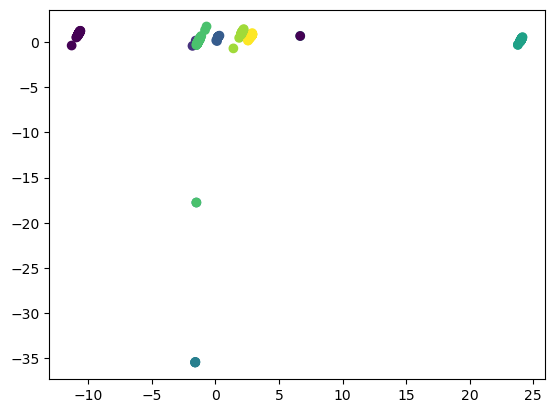

In [59]:
clf = LinearDiscriminantAnalysis(n_components=2)
ldad = clf.fit_transform(embeddings, labels)
plt.scatter(
    ldad[:, 0],
    ldad[:, 1],
    c=labels
)
plt.show()

In [70]:
df.iloc[np.squeeze(np.argwhere(ldad[:, 1] < -15))]['Message']
# stupid gibberish data

13        mor
59          s
72     uwgyeu
77        ha"
85          w
176     darla
436         w
Name: Message, dtype: object

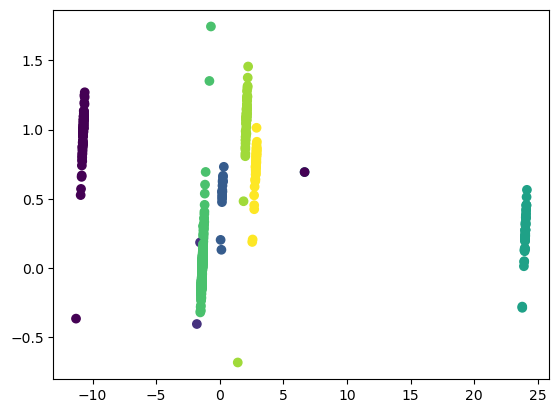

In [76]:
plt.scatter(
    ldad[ldad[:, 1] >= -15][:, 0],
    ldad[ldad[:, 1] >= -15][:, 1],
    c=np.array(labels)[ldad[:, 1] >= -15]
)
plt.show()
# This looks oddly good. Should try cross evaluation

In [81]:
# Scores very bad. weird
scores = cross_val_score(LinearDiscriminantAnalysis(n_components=2), embeddings, labels, cv=3)
scores

/nix/store/bbilhkh35cdldw231babbkycawvy38wq-python3-3.11.9-env/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


array([0.52970297, 0.69306931, 0.62871287])

Let's try some cross val since I don't trust this

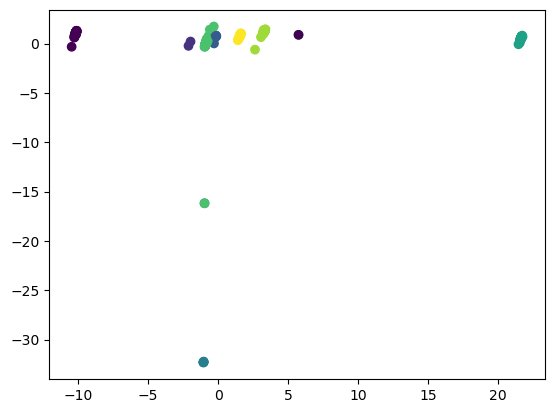

In [78]:
clf = LinearDiscriminantAnalysis(n_components=2)
ldad = clf.fit_transform(embeddings[:-100], labels[:-100])
plt.scatter(
    ldad[:, 0],
    ldad[:, 1],
    c=labels[:-100]
)
plt.show()

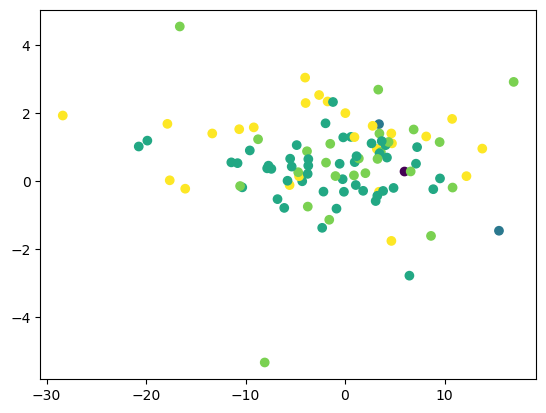

In [83]:
predicted = clf.transform(embeddings[-100:])
plt.scatter(
    predicted[:, 0],
    predicted[:, 1],
    c=labels[-100:]
)
plt.show()
# Okay this is obviously not working. Not good LDA scam.

This isn't working. I think we need better embeddings. (or less complex ones at least)
Or maybe I'l try t-sne with classes.

In [107]:
from sklearn.manifold import TSNE

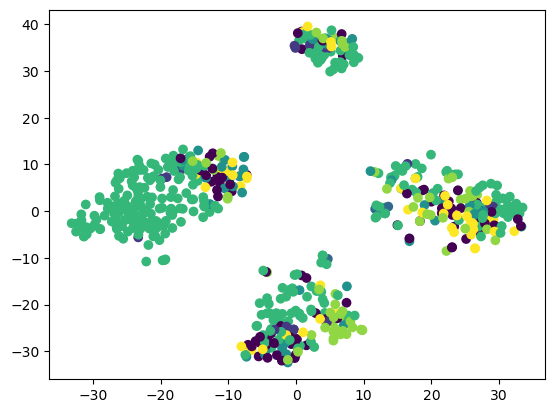

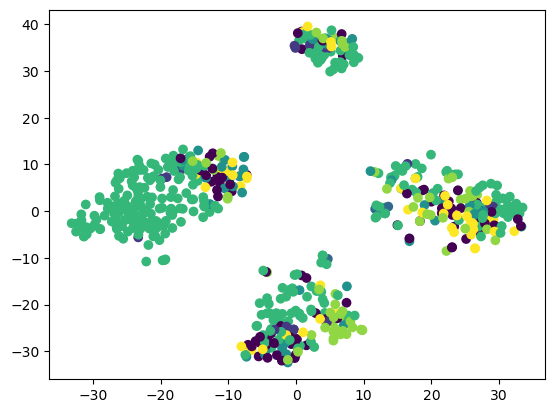

In [118]:
clf = TSNE(n_components=2)
tsned = clf.fit_transform(embeddings, labels)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(
    tsned[:, 0],
    tsned[:, 1],
    c=labels
)
display(fig)

Well that's not good. How about I try roBERTa.

In [13]:
from transformers import pipeline
classifier = pipeline('zero-shot-classification', model='roberta-large-mnli')

Some weights of the model checkpoint at roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [19]:
entry = 200
print(df['R2DiscussionType'][entry], df['Message'][entry])
classifier(df['Message'][entry], df['R2DiscussionType'].unique())
# doesn't work well, probably because the category names are ambigous.

Seminar Anna Jones, this is what I was thinking. If you really loved him you wouldn’t allow that. Alexandra, I was leaning toward the tiger at first because of the descriptions you gave. The apple doesn’t fall far from the tree and all that. 🙂


{'sequence': 'Anna Jones, this is what I was thinking. If you really loved him you wouldn’t allow that. Alexandra, I was leaning toward the tiger at first because of the descriptions you gave. The apple doesn’t fall far from the tree and all that. 🙂',
 'labels': ['Social',
  'Procedure',
  'Other',
  'Imaginative entry',
  'Deliberation',
  'Seminar',
  'UX'],
 'scores': [0.2618650496006012,
  0.24981561303138733,
  0.17693105340003967,
  0.10347723215818405,
  0.09475091844797134,
  0.06949440389871597,
  0.04366570711135864]}

In [31]:
df['R2DiscussionType'].unique()

array(['Social', 'Seminar', 'Procedure', 'Other', 'Deliberation', 'UX',
       'Imaginative entry'], dtype=object)

In [29]:
# I can try giving the whole description in the category names.
import json
with open('./unprocessed_data/definitions.json') as file:
    definitions = json.loads(file.read())
# definitions[df['R2DiscussionType'].unique()]
definitions = [definitions[x]['Definition'] if x != 'Other' else 'Other' for x in df['R2DiscussionType'].unique()]
definitions

['Discussion that establishes or maintains a relationship and does NOT relate to the assignments.',
 'Discussion on the meaning or interpretation of content. My interpretation vs. your interpretation. What does it mean?',
 'Discussion toward accomplishing a task. How should the task be accomplished? Specifically, discussion of how to complete the assignment.Big Question: How does this work? What does the teacher want us to do with this assignment?',
 'Other',
 'Turns related to decision-making about the content…. Or writing or wording. It also indicates the internal procedure of an individual, and interpersonal functioning of the group. Big Question: What should we do next?',
 "User's opinion about the IMapBook interface, or media they wish we would include, user experience, media, relationship with the media.",
 'Discourse that places the learner in the discussion as an active participant']

In [34]:
entry = 250
print(df['R2DiscussionType'][entry], df['Message'][entry])
classifier(df['Message'][entry], definitions)
# I think roberta is a bit thick.

Deliberation I tried the ones you mentioned it said try again.


{'sequence': 'I tried the ones you mentioned it said try again.',
 'labels': ['Discussion toward accomplishing a task. How should the task be accomplished? Specifically, discussion of how to complete the assignment.Big Question: How does this work? What does the teacher want us to do with this assignment?',
  'Discussion on the meaning or interpretation of content. My interpretation vs. your interpretation. What does it mean?',
  "User's opinion about the IMapBook interface, or media they wish we would include, user experience, media, relationship with the media.",
  'Other',
  'Turns related to decision-making about the content…. Or writing or wording. It also indicates the internal procedure of an individual, and interpersonal functioning of the group. Big Question: What should we do next?',
  'Discussion that establishes or maintains a relationship and does NOT relate to the assignments.',
  'Discourse that places the learner in the discussion as an active participant'],
 'scores': 

Maybe prompting llama3 is all I need.

In [3]:
from ctransformers import AutoModelForCausalLM

# Set gpu_layers to the number of layers to offload to GPU. Set to 0 if no GPU acceleration is available on your system.
llm = AutoModelForCausalLM.from_pretrained("bartowski/Meta-Llama-3-8B-Instruct-GGUF", model_file="Meta-Llama-3-8B-Instruct-Q4_K_M.gguf", model_type="llama3")

print(llm("AI is going to"))


ModuleNotFoundError: No module named 'ctransformers'

In [2]:
import outlines

In [11]:
model = outlines.models.transformers("microsoft/Phi-3-mini-4k-instruct", device="cuda")

The repository for microsoft/Phi-3-mini-4k-instruct contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/microsoft/Phi-3-mini-4k-instruct.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y
The repository for microsoft/Phi-3-mini-4k-instruct contains custom code which must be executed to correctly load the model. You can inspect the repository content at https://hf.co/microsoft/Phi-3-mini-4k-instruct.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attenton` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 376.00 MiB. GPU 0 has a total capacity of 7.92 GiB of which 83.12 MiB is free. Process 1258 has 96.00 MiB memory in use. Including non-PyTorch memory, this process has 7.13 GiB memory in use. Of the allocated memory 7.05 GiB is allocated by PyTorch, and 1.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [7]:
@outlines.prompt
def take_order(order):
    """You are the owner of a pizza parlor. Customers \
    send you orders from which you need to extract:

    1. The pizza that is ordered
    2. The number of pizzas

    # EXAMPLE

    ORDER: I would like one Margherita pizza
    RESULT: {"pizza": "Margherita", "number": 1}

    # OUTPUT INSTRUCTIONS

    Answer in valid JSON. Here are the different objects relevant for the output:

    Order:
        pizza (str): name of the pizza
        number (int): number of pizzas

    Return a valid JSON of type "Order"

    # OUTPUT

    ORDER: {{ order }}
    RESULT: """

In [8]:
from enum import Enum
from pydantic import BaseModel

class Pizza(str, Enum):
    margherita = "Margherita"
    pepperonni = "Pepperoni"
    calzone = "Calzone"

class Order(BaseModel):
    pizza: Pizza
    number: int


In [9]:
orders = [
    "Hi! I would like to order two pepperonni pizzas and would like them in 30mins.",
    "Is it possible to get 12 margheritas?"
]
prompts = [take_order(order) for order in orders]

generator = outlines.generate.json(model, Order)

results = generator(prompts)
print(results)

NameError: name 'model' is not defined